# Saving our Austin Animals 

By Glady Barrios

August, 17, 2022

# Project Goals

Although being 90% "no kill" and being the the largest no kill city in the country, there is still some ammount of animals that are undergoing euthanization.
The goal is to use machine learning models to accuratly predcict weather an animal in the shelter would lead to euthanasia. With this information we can even increcrease that 90% "no kill" and reduce the ammount of animals getting euthanized!

# Project Description

There are sevral diffrent attributes as to why our animals get euthanized, using this dataset from the City or austin website we will explore the diffrent attributes and use our best model to predict weather an animals certain characteristics will lead them to be euthanized. The attributes we will be exploring are the animals, age, sex, type and year the animal was released.

# Mini - Data dictionary

# Important Librarys

In [1]:
#these are all the importan libraries used to run the data 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from prepare import train_validate_test_split
import prepare
#these will be used for modeling 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector


# Aquire 

I aquired the data from the city of austin open database portal (put website here)

- using a downloadable csv file 

In [2]:
df = prepare.get_animal_data()

In [3]:
# this is what is inittaly in the dataset from the portal
df.head()

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


# Prepare

In [4]:
df = prepare.prep_animal_data(df)

In [5]:
#Here is the prepared data 

df.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age_upon_outcome,Breed,Color,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,
A794011,Chunk,2019-05-08 18:20:00,2019-05-01,2017-05-02,Rto-Adopt,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White,...,0,1,0,0,0,0,0,1,0,0
A776359,Gizmo,2018-07-18 16:02:00,2018-07-01,2017-07-12,Adoption,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown,...,0,0,1,0,0,0,0,1,0,0
A821648,No_name,2020-08-16 11:38:00,2020-08-01,2019-08-16,Euthanasia,Other,Unknown,1 year,Raccoon,Gray,...,0,0,0,0,1,0,0,0,0,1
A720371,Moose,2016-02-13 17:59:00,2016-02-01,2015-10-08,Adoption,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff,...,0,0,1,0,0,0,0,1,0,0
A674754,No_name,2014-03-18 11:47:00,2014-03-01,2014-03-12,Transfer,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby,...,0,1,0,0,0,0,1,0,0,0


### How the data was prepared 



In [ ]:
#df.info()

In [ ]:
#prepare.prep_animal_data(df)

## Splitting the Data

In [6]:
train, validate, test = train_validate_test_split(df, target='Euthanasia')
train.shape, validate.shape, test.shape

((79940, 38), (34260, 38), (28550, 38))

# Exploration

 My initial questions 

- what sex of animals is more likely to get euthi

- what animal type is more lkely to get euthi

- Does the age of the animal determine the euthinization

- what age are animals more likly to get adopted?

- what Breed is more likly to get adopted 


## Question 1- Is there a relationship between animal_type and Euthanization 

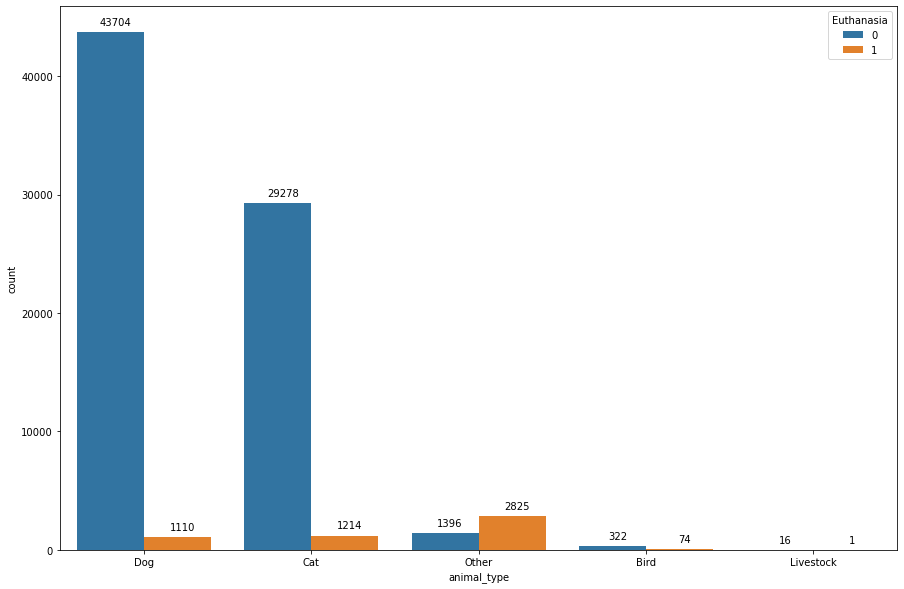

In [10]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['animal_type'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (5, 10),
                 textcoords = 'offset points')

### what we see 

### Lets run a test

$H_o$ : Animal_type and Euthanasia are independant

$H_a$ : There is a relationship between the animal type and Euthinasia

In [11]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.animal_type, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


## Question 1.2 What animal type is more likely to get adopted?

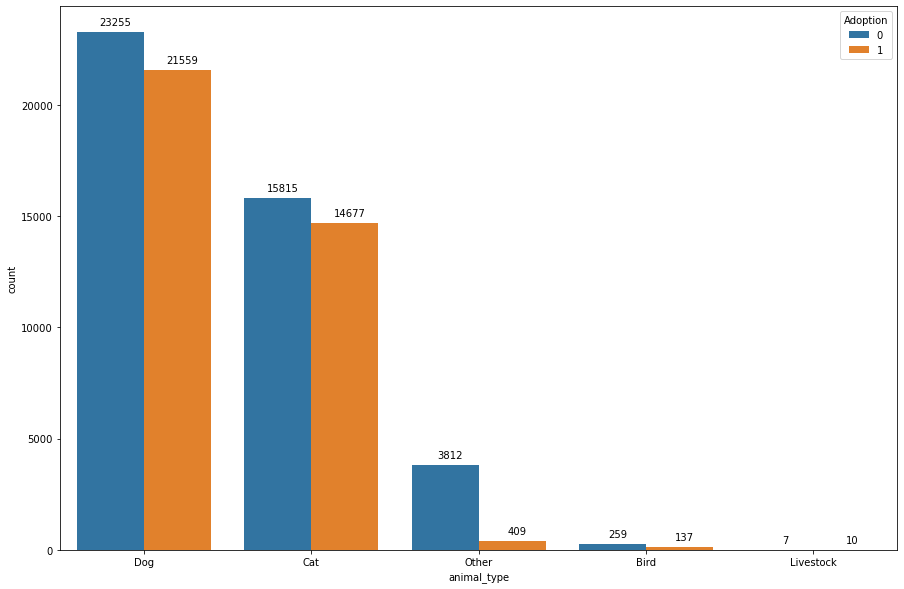

In [18]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['animal_type'],hue=train['Adoption'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (5, 10),
                 textcoords = 'offset points')

## QUESTION 2 what sex of animals is more likely to get euthi

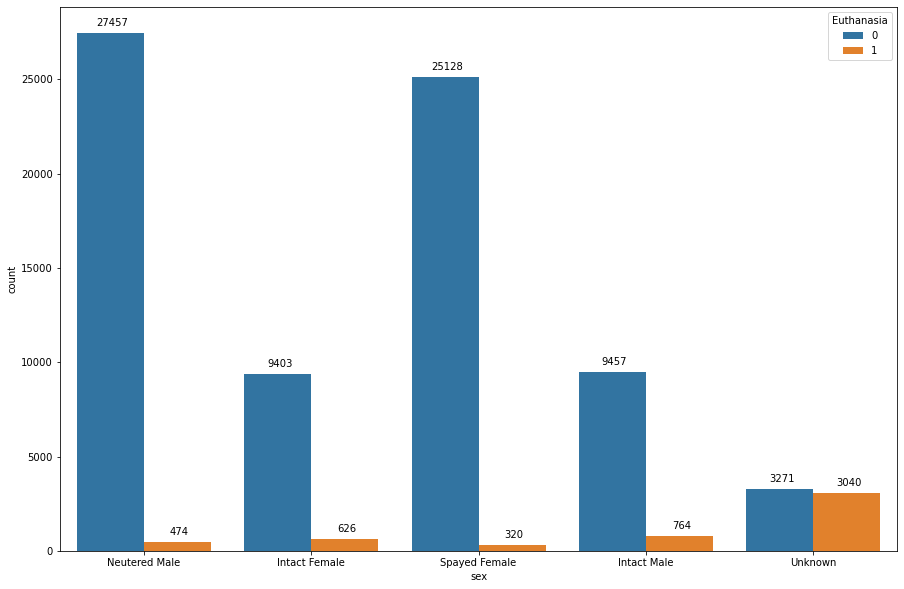

In [19]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['sex'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (2, 10),
                 textcoords = 'offset points')

$H_o$ : Sex and Euthanasia are independant

$H_a$ : There is a relationship between the animal sex and Euthinasia

In [20]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.sex, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


##  Question 3 - At what age are animals more likely to get euthanized ?

<AxesSubplot:xlabel='age_out_years', ylabel='count'>

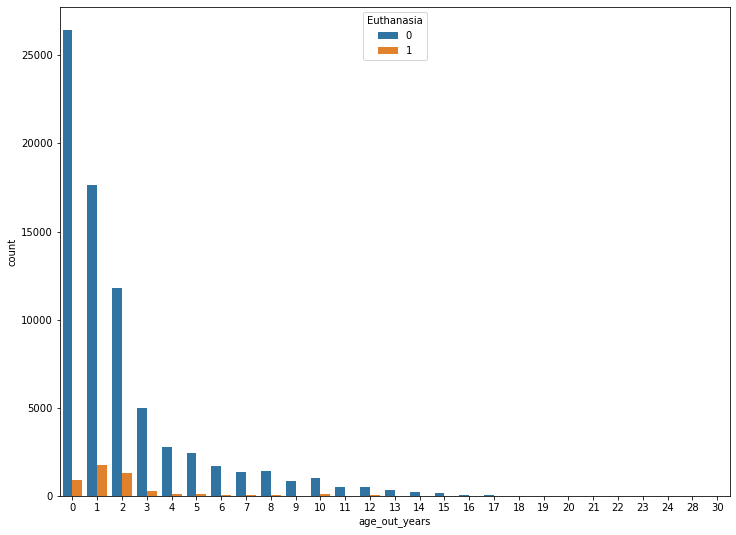

In [21]:
plt.figure(figsize=(12,9))
sns.countplot(x = train['age_out_years'] ,hue=train['Euthanasia'])

$H_o$ : the ages of the animals who are euthanized are equal to the ages of the animals that are not euthanized 

$H_a$ : the ages of the animals who are euthanized are not equal to the ages of the animals that are not euthanized

In [ ]:
Euthanasia_sample = train[train.Euthanasia == 1 ].age
No_Euthanasia_sample = train[train.Euthanasia == 0 ].age

In [ ]:
alpha = 0.05
#For this I did a T-statistical test becasue we are working with a categorical variable and a quatative variable 

t, p = stats.ttest_ind(Euthanasia_sample,No_Euthanasia_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

## Question 4 - Is there some sort of relationship between color and Euthinization 

$H_o$ : animal type and outcome are independant

$H_a$ : There is a relationship between the animal type and independntn

In [44]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.Color, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


## Question 5 - Is there some sort of relationship between Breed and Euthinization 

In [ ]:
𝐻𝑜  : Breed and ethi are independant

𝐻𝑎  : There is a relationship between the breed and euthi

In [45]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.Breed, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")

Reject the null hypothesis


# Modeling

In [ ]:
#choosing our features 

In [22]:
X_train = train.drop(columns=['Name','DateTime','MonthYear','age_upon_outcome','DOB', 'age_bin', 'outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer','age_out_years','current_age','Age_upon_out','Breed','Color'])
y_train = train[['Euthanasia']]

X_validate = validate.drop(columns=['Name','DateTime','MonthYear','DOB', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer','age_out_years','current_age','age_upon_outcome','Age_upon_out','Breed','Color'])
y_validate = validate[['Euthanasia']]

X_test = test.drop(columns=['Name','DateTime','MonthYear','DOB', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen', 'Transfer','age_out_years','current_age','age_upon_outcome','Breed','Color','Age_upon_out'])
y_test = test[['Euthanasia']]

Notes from the rubrick 


- You clearly communicate how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy.

## Creating a baseline

In [ ]:
To create this baseline I set the mean of the animals who have not been euthanized 

In [23]:
baseline_accuracy = (train.Euthanasia == 0).mean()
print(f"baseline_accuracy: {round(baseline_accuracy, 2)}")

baseline_accuracy: 0.93


In [24]:
#as we can see many animals dont get euthanized 
train.Euthanasia.value_counts()

0    74716
1     5224
Name: Euthanasia, dtype: int64

## The models I used and their outcomes in predicting Euthinization 

- Decision Tree | train: 96% |Validate: 96%
- Random forest | train: 96% |Validate: 96%
- KNN modeling  | train: 96% |Validate: 96%
- Logistic Regression model | train: 96%  |Validate: 96%

All of the Models performed similrly

## Decision Tree 

In [25]:
X_train.head()


,year_born,year_released,days_old,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,
A731965,2013,2016,1184,0,0,1,0,0,0,0,1,0,0
A817802,2019,2020,372,0,0,1,0,0,0,0,1,0,0
A811391,2011,2020,3287,0,0,1,0,0,1,0,0,0,0
A692819,2012,2016,1212,0,0,1,0,0,0,0,1,0,0
A704896,2013,2015,736,0,0,1,0,0,0,0,1,0,0


In [46]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

# Fit the model (on train and only train)
tree2 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train to begin with 
y_predictions = tree2.predict(X_train)

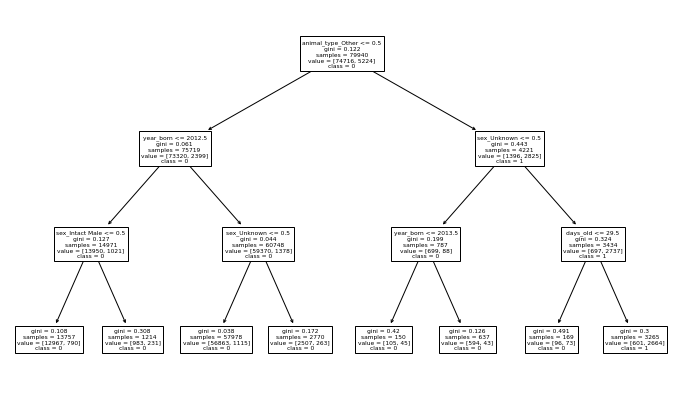

In [47]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [ ]:
### tested on train

In [48]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


In [49]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.82      0.51      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.89      0.75      0.80     79940
weighted avg       0.96      0.96      0.96     79940



In [ ]:
### tested on Validate 

In [50]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on training set: 0.96


In [ ]:
### tested on Test

In [51]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96


 This is the best model with a max depth of 3 -anymore are we are prone to overfittig the model 

In [ ]:
## overall Modeling 

- all of the models used they where all around the same range in 

# Conclusion 

## Recomendations 

## Next steps 